In [8]:
import numpy as np

v = np.array([1,2,3,4,5])
v_approx = np.array([1,2,6,4,5])

np.sum(np.abs(v-v_approx)**2)

9

In [11]:

v_approx2 = np.array([1.5,1.7,2.4,4.5,5.7])

np.sum(np.abs(v-v_approx2)**2)

1.4400000000000004

In [44]:
import numpy as np
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
n,p = X.shape

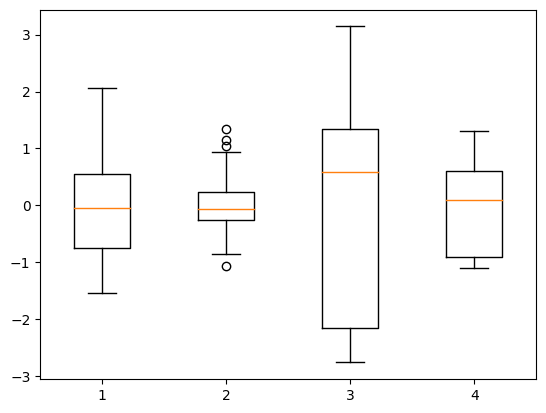

In [10]:
import matplotlib.pyplot as plt
X_c = (X - np.mean(X,axis=0) )
plt.boxplot(X_c);

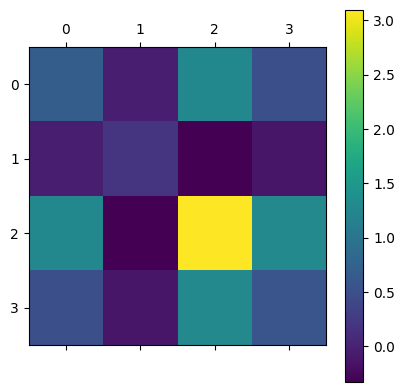

In [15]:
cov = (1/n) * X_c.T@X_c 
plt.matshow(cov)
plt.colorbar()

In [37]:
#eigen
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print(eigenvalues)

[0.02367619 0.0776881  0.24105294 4.20005343]


In [38]:
eigenvalues = eigenvalues[::-1]
print(eigenvalues)

[4.20005343 0.24105294 0.0776881  0.02367619]


In [39]:
eigenvectors = eigenvectors[:,::-1]


In [66]:
P = eigenvectors[:,:2]
P.shape

(4, 2)

In [67]:
X_proj = X_c@P
X_proj.shape

(150, 2)

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

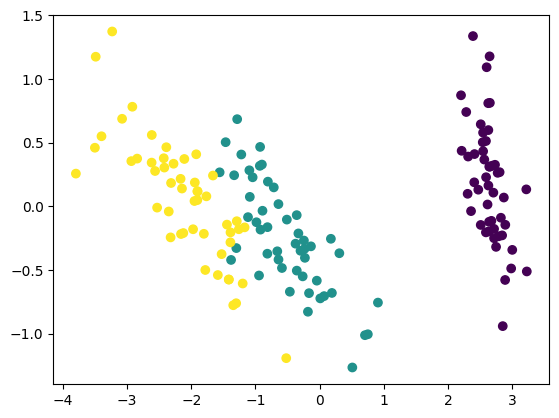

In [49]:
plt.scatter(X_proj[:,0],X_proj[:,1],c=y)

In [56]:
print(np.sum(eigenvalues[:2])/np.sum(eigenvalues))

0.9776852063187949


In [20]:
a = np.array([1,2,3,4,5,6,7,8])

In [36]:
a[::-1]

array([8, 7, 6, 5, 4, 3, 2, 1])

In [57]:
P = eigenvectors

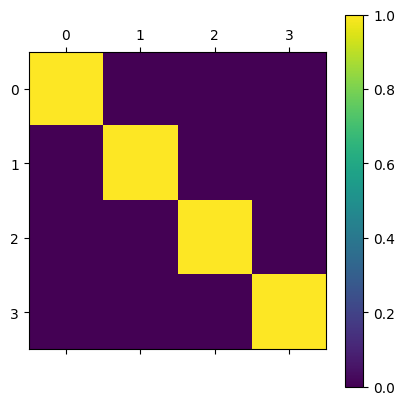

In [59]:
plt.matshow(P@P.T)
plt.colorbar()

In [70]:
X_reconstruit = X_proj@(P.T)
X_reconstruit

array([[-7.60294366e-01,  4.60080598e-01, -2.35478628e+00,
        -9.85801646e-01],
       [-1.09707143e+00,  1.00166610e-01, -2.29443823e+00,
        -9.59087413e-01],
       [-1.13921462e+00,  1.38348265e-01, -2.44978303e+00,
        -1.02415318e+00],
       [-1.20112163e+00, -3.66359253e-04, -2.29667019e+00,
        -9.59601156e-01],
       [-7.71578225e-01,  4.69221526e-01, -2.39426155e+00,
        -1.00233342e+00],
       [-3.37522840e-01,  7.34074895e-01, -2.08247184e+00,
        -8.73163745e-01],
       [-1.07804387e+00,  1.73077689e-01, -2.40076163e+00,
        -1.00381557e+00],
       [-8.41776851e-01,  3.41265772e-01, -2.27806769e+00,
        -9.53251837e-01],
       [-1.42281302e+00, -1.78296615e-01, -2.37241580e+00,
        -9.90508191e-01],
       [-1.04060100e+00,  1.42834473e-01, -2.26994598e+00,
        -9.49031733e-01],
       [-4.82432069e-01,  6.82897903e-01, -2.25946520e+00,
        -9.46902519e-01],
       [-9.34543195e-01,  2.31591874e-01, -2.24082438e+00,
      

In [72]:
import imageio

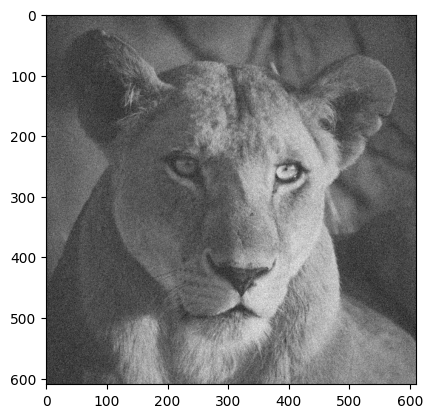

In [145]:
import imageio.v3 as iio
im = iio.imread('test.png')
#plt.imshow(im,cmap='gray')
bruit =np.random.randn(610,610)*20 
im_b = im +bruit
plt.imshow(im_b,cmap='gray')
im = im_b

In [146]:
im.shape
n,p = im.shape

In [147]:
im_c = im - np.mean(im,axis=0)
np.allclose(np.mean(im_c,axis=0),0) 

True

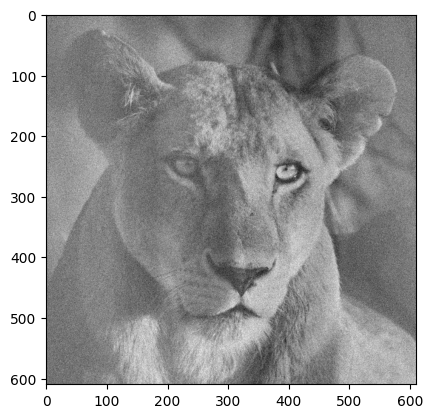

In [148]:
plt.imshow(im_c,cmap='gray')


In [149]:
cov = (1/n) * im_c.T@im_c

In [150]:
cov.shape

(610, 610)

In [151]:
w,v = np.linalg.eigh(cov)

In [152]:
w = w[::-1]
v = v[:,::-1]

In [155]:
d = 5
P = v[:,:d]
print(P.shape)
print(np.sum(w[:d])/np.sum(w))

(610, 5)
0.6317820319083867


(610, 5)

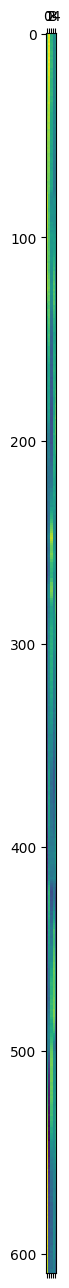

In [156]:
im_p = im_c @ P
plt.matshow(im_p)
im_p.shape

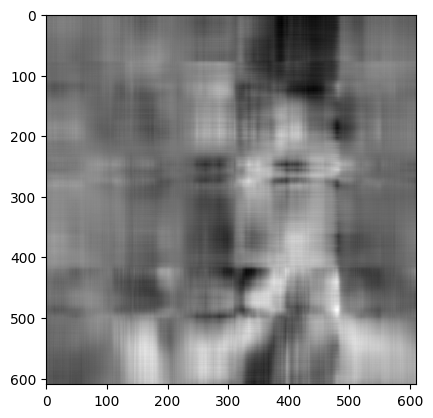

In [157]:
plt.imshow(im_p@P.T,cmap='gray')